Implémentation de résolution numérique approchée de l'équation 1 :
$\frac{dy}{dx} = f(x,y), 
y(a) = A$
à l'aide de la la méthode de descente de gradients sur la fonction d'erreur


In [290]:
#imports
from numpy import pi, cos, sin, dot, zeros, linspace, arange, matmul
from numpy.random import randn

from matplotlib.pyplot import plot, show, yscale, legend, savefig

Paramètres du modèle

In [291]:
#nombre de coefficients de Fourier ajustables
M = 10
M_range = arange(M) + 1

# nombre de points pour la variable indépendante
N = 100
X = linspace(0,1,N)

Définition du gradient

In [292]:
def calcGrad(A, M, N, X) :
    #Calcule le gradient de l'erreur par rapport au vecteur
    #des coefficients
    grad = zeros((M))
    V = cos(2*pi*X)
    for m in range(1, M+1) :
        for i in range(N) :
            V[i] += 2*pi*m*A[m-1]*cos(2*pi*m*X[i])
    for l in range(1, M+1) :
        W = pi*l*cos(2*pi*l*X)
        grad[l-1] = dot(V,W)
    return grad

Calcul matriciel du gradient

In [293]:
mat = zeros((M,M))

for l in range(1,M+1) :
    for m in range(1,M+1) :
        mat[m-1,l-1] = m*l*dot(cos(2*pi*m*X), cos(2*pi*l*X))
mat *= 2*pi

b = zeros(M)
for l in range(1,M+1) :
    b[l-1] = -l*dot(cos(2*pi*X), cos(2*pi*l*X))
d = -b

def calcGrad_mat(A, mat, d) :
    return matmul(mat, A) + d

Calcul de l'erreur

In [294]:
def calcError(A, M, N, X) :
    E = 0
    for i in range(N) :
        e = 0
        for m in range(1,M+1) :
            e+=m*A[m-1]*cos(2*pi*m*X[i])
        e *= 2*pi
        e+= cos(2*pi*X[i])
        E += e**2

    E *=0.5
    return E

Paramètres d'apprentissage

In [295]:
alpha_min = 6.21894189418942e-05 #taux d'apprentissage pour la descente de gradients
alpha_1 = 6.280708070807081e-05 #taux d'apprentissage pour la descente de gradients
alpha_ = 6.3e-5
epochs = 4000 #nombre d'itération

#initialisation des coefficients
A_min = randn((M))
A_1 = randn((M))
A_ = randn((M))

Entraînement

In [296]:
E_min = []
E_1 = []
E_ = []

for k in range(epochs) :
    if k%(epochs//100)==0 :
        #print("Coefficients après",k,"itérations :",A)
        E_min.append(calcError(A_min,M,N,X))
        E_1.append(calcError(A_1,M,N,X))
        E_.append(calcError(A_,M,N,X))

    A_min -= alpha_min*calcGrad_mat(A_min, mat, d)
    A_1 -= alpha_1*calcGrad_mat(A_1, mat, d)
    A_ -= alpha_*calcGrad_mat(A_, mat, d)

E_min.append(calcError(A_min,M,N,X))
E_1.append(calcError(A_1,M,N,X))
E_.append(calcError(A_,M,N,X))

Affichage des résultats

In [297]:
print()
print("Coefficients finaux A_min après",epochs,"itérations :",A_min)
print("Coefficients finaux A_1 après",epochs,"itérations :",A_1)
print("Coefficients finaux A_ après",epochs,"itérations :",A_)


Coefficients finaux A_min après 4000 itérations : [-1.59154943e-01  1.44234023e-19 -2.65577547e-19  5.06552858e-20
 -9.04867142e-20 -1.13446375e-19 -1.02374682e-19 -1.21933038e-19
 -2.89537286e-19 -1.33947042e-18]
Coefficients finaux A_1 après 4000 itérations : [-0.15945205 -0.00061233 -0.00096768 -0.00139479 -0.00194625 -0.0027225
 -0.00394971 -0.00627791 -0.01267711 -0.12630111]
Coefficients finaux A_ après 4000 itérations : [-9.97366381e+07 -2.05555709e+08 -3.24842303e+08 -4.68220175e+08
 -6.53343714e+08 -9.13923488e+08 -1.32588978e+09 -2.10744981e+09
 -4.25561690e+09 -4.23983899e+10]


Affichage graphique de l'erreur

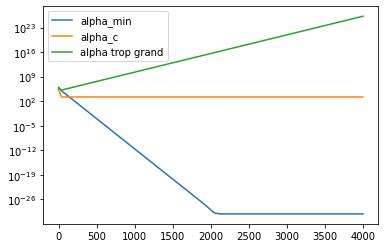

In [298]:
plot([40*k for k in range(101)], E_min, label = 'alpha_min')
plot([40*k for k in range(101)], E_1, label = 'alpha_c')
plot([40*k for k in range(101)], E_, label = 'alpha trop grand')
yscale('log')
legend()
savefig("comparaison_erreurs_selon_alpha_1D.jpg")
show()

Affichage des résultats

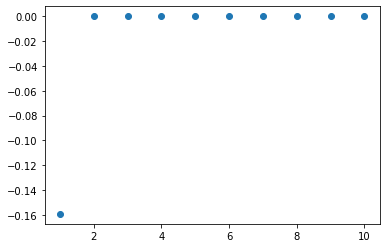

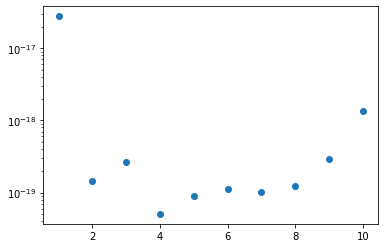

In [299]:
from matplotlib.pyplot import scatter, show, yscale, savefig

#erreur relative sur le premier coefficient
#valeurs théoriques :
A_th = zeros((M))
A_th[0] = -1/(2*pi)

erreur = abs(A_min-A_th)

scatter(range(1, M+1), A_min)
savefig('coefs_1_DG.jpg')
show()

scatter(range(1, M+1), erreur)
yscale('log')
savefig('coefs_1_DG_erreur.jpg')
show()
